In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df=pd.read_csv('train_data.csv')
validation_df=pd.read_csv('validation_data.csv')
test_df=pd.read_csv('test_data.csv')
promotion_df=pd.read_csv('promotion_data.csv')

In [ ]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20651 entries, 0 to 20650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryCode  20651 non-null  object
 1   ItemCode      20651 non-null  int64 
 2   DateID        20651 non-null  object
 3   DailySales    20651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 645.5+ KB


In [ ]:
train_df['CategoryNo']=train_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo
0,category_2,1071115,12/19/2021,1,2
1,category_4,210652,2/13/2022,1,4
2,category_2,877624,12/19/2021,1,2
3,category_1,371104,12/19/2021,3,1
4,category_1,1090294,12/19/2021,3,1


In [ ]:
from datetime import datetime

s1=[]


for i in train_df['DateID']:
  d1=datetime.strptime(i, '%m/%d/%Y')
  s1.append(d1)

d1 = pd.Series(s1,name='date')

d1

0       2021-12-19
1       2022-02-13
2       2021-12-19
3       2021-12-19
4       2021-12-19
           ...    
20646   2021-10-12
20647   2021-10-12
20648   2021-10-12
20649   2021-10-12
20650   2021-10-12
Name: date, Length: 20651, dtype: datetime64[ns]

In [ ]:
train_df=pd.concat([train_df, d1], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date
0,category_2,1071115,12/19/2021,1,2,2021-12-19
1,category_4,210652,2/13/2022,1,4,2022-02-13
2,category_2,877624,12/19/2021,1,2,2021-12-19
3,category_1,371104,12/19/2021,3,1,2021-12-19
4,category_1,1090294,12/19/2021,3,1,2021-12-19


In [ ]:
from datetime import date
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()
s_date

weeks_no=[]
for i in train_df['date']:
  da=((i.date()-s_date).days)//7
  da=da+1
  weeks_no.append(da)

d2 = pd.Series(weeks_no,name='Week')
train_df=pd.concat([train_df, d2], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12
1,category_4,210652,2/13/2022,1,4,2022-02-13,20
2,category_2,877624,12/19/2021,1,2,2021-12-19,12
3,category_1,371104,12/19/2021,3,1,2021-12-19,12
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12


In [ ]:
train_df['WeeklySales']=train_df.groupby(['CategoryNo','ItemCode','Week'])['DailySales'].transform(sum)
train_df

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14
...,...,...,...,...,...,...,...,...
20646,category_1,36898,10/12/2021,1,1,2021-10-12,2,37
20647,category_2,111436,10/12/2021,1,2,2021-10-12,2,10
20648,category_2,815101,10/12/2021,4,2,2021-10-12,2,15
20649,category_3,1064572,10/12/2021,1,3,2021-10-12,2,7


In [ ]:
train_df['year']= train_df['date'].dt.year
train_df['month']= train_df['date'].dt.month
train_df['week_of_year'] = train_df['date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales,year,month,week_of_year
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2,2021,12,50
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8,2022,2,6
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32,2021,12,50
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11,2021,12,50
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14,2021,12,50


In [ ]:
train_df.duplicated(subset=['CategoryNo','ItemCode','Week','WeeklySales','month','year','week_of_year']).sum()

12760

In [ ]:
train_df.loc[train_df.duplicated(subset=['CategoryNo','ItemCode','Week','WeeklySales'],keep=False), :]

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales,year,month,week_of_year
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2,2021,12,50
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8,2022,2,6
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32,2021,12,50
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11,2021,12,50
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14,2021,12,50
...,...,...,...,...,...,...,...,...,...,...,...
20646,category_1,36898,10/12/2021,1,1,2021-10-12,2,37,2021,10,41
20647,category_2,111436,10/12/2021,1,2,2021-10-12,2,10,2021,10,41
20648,category_2,815101,10/12/2021,4,2,2021-10-12,2,15,2021,10,41
20649,category_3,1064572,10/12/2021,1,3,2021-10-12,2,7,2021,10,41


In [ ]:
train=train_df[['CategoryNo','ItemCode','Week','WeeklySales','year','month','week_of_year']]
train.drop_duplicates(keep='first',inplace=True)
train

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,1071115,12,2,2021,12,50
1,4,210652,20,8,2022,2,6
2,2,877624,12,32,2021,12,50
3,1,371104,12,11,2021,12,50
4,1,1090294,12,14,2021,12,50
...,...,...,...,...,...,...,...
20577,1,59047,2,6,2021,10,41
20579,2,50785,2,11,2021,10,41
20590,2,999403,2,6,2021,10,41
20597,3,1081087,2,15,2021,10,41


In [ ]:
train=train.reset_index(drop=True)
train

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,1071115,12,2,2021,12,50
1,4,210652,20,8,2022,2,6
2,2,877624,12,32,2021,12,50
3,1,371104,12,11,2021,12,50
4,1,1090294,12,14,2021,12,50
...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41
7887,2,50785,2,11,2021,10,41
7888,2,999403,2,6,2021,10,41
7889,3,1081087,2,15,2021,10,41


In [ ]:
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice
0,379249,12/3/2021,12/9/2021,10,Percentage,70
1,1066570,11/19/2021,11/25/2021,15,Percentage,45
2,124954,10/29/2021,11/4/2021,15,Percentage,210
3,35530,10/22/2021,10/28/2021,15,Percentage,60
4,1013335,1/21/2022,1/27/2022,10,Percentage,210


In [ ]:
s1=[]


for i in promotion_df['PromotionStartDate']:
  d1=datetime.strptime(i, '%m/%d/%Y')
  s1.append(d1)

d1 = pd.Series(s1,name='PromotionStart')

s2=[]
for i in promotion_df['PromotionEndDate']:
  d2=datetime.strptime(i, '%m/%d/%Y')
  s2.append(d2)

d2 = pd.Series(s2,name='PromotionEnd')



In [ ]:
promotion_df=pd.concat([promotion_df, d1,d2], axis=1)
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,379249,12/3/2021,12/9/2021,10,Percentage,70,2021-12-03,2021-12-09
1,1066570,11/19/2021,11/25/2021,15,Percentage,45,2021-11-19,2021-11-25
2,124954,10/29/2021,11/4/2021,15,Percentage,210,2021-10-29,2021-11-04
3,35530,10/22/2021,10/28/2021,15,Percentage,60,2021-10-22,2021-10-28
4,1013335,1/21/2022,1/27/2022,10,Percentage,210,2022-01-21,2022-01-27


In [ ]:
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()
s_date

weeks_no=[]
for i in promotion_df['PromotionStart']:
  da=((i.date()-s_date).days)//7
  da=da+1
  weeks_no.append(da)

d3 = pd.Series(weeks_no,name='Week')
promotion_df=pd.concat([promotion_df, d3], axis=1)
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Week
0,379249,12/3/2021,12/9/2021,10,Percentage,70,2021-12-03,2021-12-09,10
1,1066570,11/19/2021,11/25/2021,15,Percentage,45,2021-11-19,2021-11-25,8
2,124954,10/29/2021,11/4/2021,15,Percentage,210,2021-10-29,2021-11-04,5
3,35530,10/22/2021,10/28/2021,15,Percentage,60,2021-10-22,2021-10-28,4
4,1013335,1/21/2022,1/27/2022,10,Percentage,210,2022-01-21,2022-01-27,17


In [ ]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ItemCode            314 non-null    int64         
 1   PromotionStartDate  314 non-null    object        
 2   PromotionEndDate    314 non-null    object        
 3   DiscountValue       314 non-null    int64         
 4   DiscountType        314 non-null    object        
 5   SellingPrice        314 non-null    int64         
 6   PromotionStart      314 non-null    datetime64[ns]
 7   PromotionEnd        314 non-null    datetime64[ns]
 8   Week                314 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 22.2+ KB


In [ ]:
result = pd.merge(train,promotion_df, how="left", on=["ItemCode", "Week"])

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 7890
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CategoryNo          7891 non-null   int64         
 1   ItemCode            7891 non-null   int64         
 2   Week                7891 non-null   int64         
 3   WeeklySales         7891 non-null   int64         
 4   year                7891 non-null   int64         
 5   month               7891 non-null   int64         
 6   week_of_year        7891 non-null   int64         
 7   PromotionStartDate  560 non-null    object        
 8   PromotionEndDate    560 non-null    object        
 9   DiscountValue       560 non-null    float64       
 10  DiscountType        560 non-null    object        
 11  SellingPrice        560 non-null    float64       
 12  PromotionStart      560 non-null    datetime64[ns]
 13  PromotionEnd        560 non-null    datetime64[n

In [ ]:
result.drop(['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)

In [ ]:
result

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,NaN,NaN,NaN,NaT,NaT
1,4,210652,20,8,2022,2,6,NaN,NaN,NaN,NaT,NaT
2,2,877624,12,32,2021,12,50,NaN,NaN,NaN,NaT,NaT
3,1,371104,12,11,2021,12,50,NaN,NaN,NaN,NaT,NaT
4,1,1090294,12,14,2021,12,50,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,NaN,NaN,NaN,NaT,NaT
7887,2,50785,2,11,2021,10,41,NaN,NaN,NaN,NaT,NaT
7888,2,999403,2,6,2021,10,41,NaN,NaN,NaN,NaT,NaT
7889,3,1081087,2,15,2021,10,41,NaN,NaN,NaN,NaT,NaT


In [ ]:
result[['DiscountValue','DiscountType','SellingPrice']]=result[['DiscountValue','DiscountType','SellingPrice']].replace(np.NaN,0)
result

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,0.0,0,0.0,NaT,NaT
1,4,210652,20,8,2022,2,6,0.0,0,0.0,NaT,NaT
2,2,877624,12,32,2021,12,50,0.0,0,0.0,NaT,NaT
3,1,371104,12,11,2021,12,50,0.0,0,0.0,NaT,NaT
4,1,1090294,12,14,2021,12,50,0.0,0,0.0,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,0.0,0,0.0,NaT,NaT
7887,2,50785,2,11,2021,10,41,0.0,0,0.0,NaT,NaT
7888,2,999403,2,6,2021,10,41,0.0,0,0.0,NaT,NaT
7889,3,1081087,2,15,2021,10,41,0.0,0,0.0,NaT,NaT


In [ ]:
result[['PromotionStart','PromotionEnd']]=result[['PromotionStart','PromotionEnd']].replace(np.NaN,0)

In [ ]:
result


,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,0.0,0,0.0,0,0
1,4,210652,20,8,2022,2,6,0.0,0,0.0,0,0
2,2,877624,12,32,2021,12,50,0.0,0,0.0,0,0
3,1,371104,12,11,2021,12,50,0.0,0,0.0,0,0
4,1,1090294,12,14,2021,12,50,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,0.0,0,0.0,0,0
7887,2,50785,2,11,2021,10,41,0.0,0,0.0,0,0
7888,2,999403,2,6,2021,10,41,0.0,0,0.0,0,0
7889,3,1081087,2,15,2021,10,41,0.0,0,0.0,0,0


In [ ]:
def isPromo(row):
  if row['DiscountValue']==0:
    return 0
  else:
    return 1



In [ ]:
result['OnPromo'] = result.apply (lambda row: isPromo(row), axis=1)

In [ ]:
result.loc[result['DiscountType']=='Amount']

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,OnPromo
673,4,1082743,19,58,2022,2,6,20.0,Amount,300.0,2022-02-04 00:00:00,2022-02-10 00:00:00,1
1179,4,1082743,18,26,2022,1,4,20.0,Amount,300.0,2022-01-28 00:00:00,2022-02-03 00:00:00,1
5617,4,1082743,20,25,2022,2,6,20.0,Amount,300.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1


In [ ]:
result[['OnPromo']].value_counts()

OnPromo
0          7331
1           560
dtype: int64

In [ ]:
def calculateDiscount(row):
  if row['DiscountValue']!=0:
    if row['DiscountType']=='Percentage':
      value=(row['DiscountValue']*row['SellingPrice'])/100
      return value
    else:
      return row['DiscountValue']
  else:
    return 0

In [ ]:
result['Discount'] = result.apply (lambda row: calculateDiscount(row), axis=1)

In [ ]:
result.loc[result['DiscountValue']>0]

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,OnPromo,Discount
13,2,130993,20,66,2022,2,6,10.0,Percentage,70.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,7.0
21,1,379249,12,108,2021,12,50,10.0,Percentage,70.0,2021-12-17 00:00:00,2021-12-23 00:00:00,1,7.0
22,2,124954,20,34,2022,2,6,10.0,Percentage,210.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,21.0
25,2,1101571,20,29,2022,2,6,10.0,Percentage,140.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,14.0
34,1,1085749,12,17,2021,12,50,10.0,Percentage,70.0,2021-12-17 00:00:00,2021-12-23 00:00:00,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,1,1085749,7,4,2021,11,46,10.0,Percentage,70.0,2021-11-12 00:00:00,2021-11-18 00:00:00,1,7.0
7818,4,1074823,5,91,2021,11,44,15.0,Percentage,280.0,2021-10-29 00:00:00,2021-11-04 00:00:00,1,42.0
7822,2,23569,5,13,2021,11,44,10.0,Percentage,75.0,2021-10-29 00:00:00,2021-11-04 00:00:00,1,7.5
7832,1,1048975,9,18,2021,11,48,10.0,Percentage,70.0,2021-11-26 00:00:00,2021-12-02 00:00:00,1,7.0


In [ ]:
result.corr()

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,SellingPrice,OnPromo,Discount
CategoryNo,1.000000,0.075301,-0.019256,0.179616,-0.016731,0.014810,0.017774,0.075534,0.117402,0.033012,0.141023
ItemCode,0.075301,1.000000,-0.000926,-0.161135,-0.004348,0.004700,0.005938,-0.014373,-0.032417,-0.024140,-0.016649
Week,-0.019256,-0.000926,1.000000,0.012339,0.811149,-0.719035,-0.682605,-0.020408,-0.007542,-0.012583,-0.017541
WeeklySales,0.179616,-0.161135,0.012339,1.000000,0.009720,-0.008717,-0.006194,0.167834,0.110509,0.121769,0.154519
year,-0.016731,-0.004348,0.811149,0.009720,1.000000,-0.988015,-0.921238,-0.043130,-0.028453,-0.035389,-0.042341
month,0.014810,0.004700,-0.719035,-0.008717,-0.988015,1.000000,0.929530,0.046831,0.032289,0.039525,0.046412
week_of_year,0.017774,0.005938,-0.682605,-0.006194,-0.921238,0.929530,1.000000,0.046937,0.031655,0.039008,0.044902
DiscountValue,0.075534,-0.014373,-0.020408,0.167834,-0.043130,0.046831,0.046937,1.000000,0.794101,0.913189,0.821757
SellingPrice,0.117402,-0.032417,-0.007542,0.110509,-0.028453,0.032289,0.031655,0.794101,1.000000,0.820555,0.890940
OnPromo,0.033012,-0.024140,-0.012583,0.121769,-0.035389,0.039525,0.039008,0.913189,0.820555,1.000000,0.688959


In [ ]:
validation_df=pd.read_csv('validation_data.csv')

In [ ]:
validation_df['CategoryNo']=validation_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
validation_df['WeekNo']=validation_df['Week'].map({'w1':1,'w2': 2,'w3':3,'w4':4})

validation_df.head()

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,CategoryNo,WeekNo
0,category_2,1006090,w1,0,9,2,1
1,category_2,1105009,w1,0,15,2,1
2,category_2,1098502,w3,0,7,2,3
3,category_1,1081321,w3,0,25,1,3
4,category_4,1074823,w1,0,24,4,1


In [ ]:
validation_df.drop('Week',axis=1,inplace=True)

In [ ]:
validation_df

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo
0,category_2,1006090,0,9,2,1
1,category_2,1105009,0,15,2,1
2,category_2,1098502,0,7,2,3
3,category_1,1081321,0,25,1,3
4,category_4,1074823,0,24,4,1
...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1
369,category_2,1006090,0,20,2,2
370,category_1,1090303,0,12,1,1
371,category_2,1090276,0,8,2,3


In [ ]:
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()

i_date=datetime.strptime('02/18/2022', '%m/%d/%Y')
i_date.date()

da=((i_date.date()-s_date).days)//7
da=da+1
da

21

In [ ]:
def countweek(row):
  if row['WeekNo']==1:
    return da
  elif row['WeekNo']==2:
    return da+1
  elif row['WeekNo']==3:
    return da+2
  else:
    return da+3


In [ ]:
validation_df['Week'] = validation_df.apply (lambda row: countweek(row), axis=1)

In [ ]:
validation_df

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week
0,category_2,1006090,0,9,2,1,21
1,category_2,1105009,0,15,2,1,21
2,category_2,1098502,0,7,2,3,23
3,category_1,1081321,0,25,1,3,23
4,category_4,1074823,0,24,4,1,21
...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21
369,category_2,1006090,0,20,2,2,22
370,category_1,1090303,0,12,1,1,21
371,category_2,1090276,0,8,2,3,23


In [ ]:
val_result=pd.merge(validation_df,promotion_df, how="left", on=["ItemCode", "Week"])

In [ ]:
val_result.loc[val_result['OnPromo']==0]

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,category_2,1006090,0,9,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,category_2,1105009,0,15,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,category_2,1098502,0,7,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,category_1,1081321,0,25,1,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,category_4,1074823,0,24,4,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
369,category_2,1006090,0,20,2,2,22,NaN,NaN,NaN,NaN,NaN,NaT,NaT
370,category_1,1090303,0,12,1,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
371,category_2,1090276,0,8,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
val_result

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,category_2,1006090,0,9,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,category_2,1105009,0,15,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,category_2,1098502,0,7,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,category_1,1081321,0,25,1,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,category_4,1074823,0,24,4,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
369,category_2,1006090,0,20,2,2,22,NaN,NaN,NaN,NaN,NaN,NaT,NaT
370,category_1,1090303,0,12,1,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
371,category_2,1090276,0,8,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
val_result.drop(['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)
val_result[['DiscountValue','DiscountType','SellingPrice']]=val_result[['DiscountValue','DiscountType','SellingPrice']].replace(np.NaN,0)
val_result[['PromotionStart','PromotionEnd']]=val_result[['PromotionStart','PromotionEnd']].replace(np.NaN,0)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 7890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CategoryNo      7891 non-null   int64  
 1   ItemCode        7891 non-null   int64  
 2   Week            7891 non-null   int64  
 3   WeeklySales     7891 non-null   int64  
 4   year            7891 non-null   int64  
 5   month           7891 non-null   int64  
 6   week_of_year    7891 non-null   int64  
 7   DiscountValue   7891 non-null   float64
 8   DiscountType    7891 non-null   object 
 9   SellingPrice    7891 non-null   float64
 10  PromotionStart  7891 non-null   object 
 11  PromotionEnd    7891 non-null   object 
 12  OnPromo         7891 non-null   int64  
 13  Discount        7891 non-null   float64
dtypes: float64(3), int64(8), object(3)
memory usage: 924.7+ KB


In [ ]:
val_result['Discount'] = val_result.apply (lambda row: calculateDiscount(row), axis=1)

In [ ]:
val_result.loc[val_result['OnPromo']==1]

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount
60,category_2,30877,1,121,2,2,22,10.0,Percentage,70.0,2022-02-25 00:00:00,2022-03-03 00:00:00,7.00
64,category_2,1090258,1,61,2,3,23,10.0,Percentage,140.0,2022-03-04 00:00:00,2022-03-10 00:00:00,14.00
75,category_3,1066570,1,124,3,2,22,15.0,Percentage,45.0,2022-02-25 00:00:00,2022-03-03 00:00:00,6.75
81,category_1,1085749,1,17,1,1,21,10.0,Percentage,70.0,2022-02-18 00:00:00,2022-02-24 00:00:00,7.00
82,category_2,50785,1,72,2,3,23,10.0,Percentage,65.0,2022-03-04 00:00:00,2022-03-10 00:00:00,6.50
89,category_2,1101571,1,17,2,4,24,10.0,Percentage,150.0,2022-03-11 00:00:00,2022-03-17 00:00:00,15.00
100,category_2,1090258,1,27,2,2,22,10.0,Percentage,140.0,2022-02-25 00:00:00,2022-03-03 00:00:00,14.00
123,category_2,50785,1,39,2,1,21,10.0,Percentage,65.0,2022-02-18 00:00:00,2022-02-24 00:00:00,6.50
130,category_2,64978,1,22,2,2,22,10.0,Percentage,250.0,2022-02-25 00:00:00,2022-03-03 00:00:00,25.00
140,category_3,1066570,1,41,3,4,24,15.0,Percentage,45.0,2022-03-11 00:00:00,2022-03-17 00:00:00,6.75


In [ ]:
scale_mapper2 = {1:2, 2:2, 3:3,4:3}
val_result["month"] = val_result["WeekNo"].map(scale_mapper2)
val_result

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount,month
0,category_2,1006090,0,9,2,1,21,0.0,0,0.0,0,0,0.0,2
1,category_2,1105009,0,15,2,1,21,0.0,0,0.0,0,0,0.0,2
2,category_2,1098502,0,7,2,3,23,0.0,0,0.0,0,0,0.0,3
3,category_1,1081321,0,25,1,3,23,0.0,0,0.0,0,0,0.0,3
4,category_4,1074823,0,24,4,1,21,0.0,0,0.0,0,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,0.0,0,0.0,0,0,0.0,2
369,category_2,1006090,0,20,2,2,22,0.0,0,0.0,0,0,0.0,2
370,category_1,1090303,0,12,1,1,21,0.0,0,0.0,0,0,0.0,2
371,category_2,1090276,0,8,2,3,23,0.0,0,0.0,0,0,0.0,3


In [ ]:
tra_result=result[['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']]

In [ ]:
tra_result.duplicated(subset=['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']).sum()

3356

In [ ]:
tra_result.drop_duplicates(keep='first',inplace=True)
tra_result=tra_result.reset_index(drop=True)
tra_result

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
0,2,1071115,12,12,0,0.0,2
1,4,210652,20,2,0,0.0,8
2,2,877624,12,12,0,0.0,32
3,1,371104,12,12,0,0.0,11
4,1,1090294,12,12,0,0.0,14
...,...,...,...,...,...,...,...
4530,2,210868,4,10,0,0.0,4
4531,2,213802,5,11,0,0.0,8
4532,2,1090258,4,10,0,0.0,3
4533,1,48940,2,10,0,0.0,12


In [ ]:
validation=val_result[['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']]

In [ ]:
tra_result.corr()

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
CategoryNo,1.000000,0.076323,-0.012730,0.011116,0.036382,0.147232,0.177564
ItemCode,0.076323,1.000000,0.002810,-0.001052,-0.021716,-0.015856,-0.160243
Week,-0.012730,0.002810,1.000000,-0.715834,-0.019197,-0.022304,0.010212
month,0.011116,-0.001052,-0.715834,1.000000,0.041844,0.048324,-0.004050
OnPromo,0.036382,-0.021716,-0.019197,0.041844,1.000000,0.687957,0.125225
Discount,0.147232,-0.015856,-0.022304,0.048324,0.687957,1.000000,0.150402
WeeklySales,0.177564,-0.160243,0.010212,-0.004050,0.125225,0.150402,1.000000


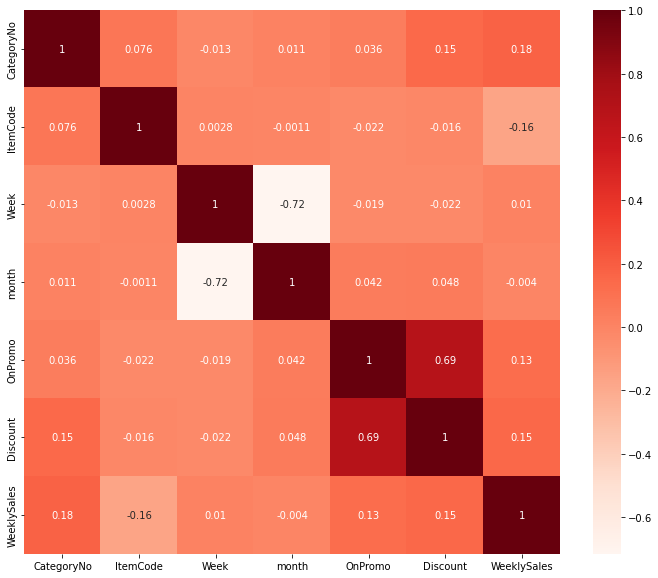

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = tra_result.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_train=tra_result[['CategoryNo','ItemCode','month','Discount','OnPromo']]
y_train=tra_result['WeeklySales']

In [ ]:
X_val=validation[['CategoryNo','ItemCode','month','Discount','OnPromo']]
y_val=validation['WeeklySales']

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=1000,objective='reg:squarederror')

xgbr.fit(X_train, y_train)
ypred = np.round(xgbr.predict(X_val))


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_val,ypred)

0.7791969060079086

In [ ]:
(abs(ypred-y_val).sum())/(y_val.sum())

0.36771850615890467

In [ ]:
d1 = pd.Series(ypred,name='PredictedSales')
df=pd.concat([y_val, d1], axis=1)
df

,WeeklySales,PredictedSales
0,9,15.0
1,15,8.0
2,7,6.0
3,25,18.0
4,24,53.0
...,...,...
368,52,51.0
369,20,15.0
370,12,10.0
371,8,8.0


In [ ]:
df1=df.loc[df['PredictedSales']<df['WeeklySales']]
df1

,WeeklySales,PredictedSales
1,15,8.0
2,7,6.0
3,25,18.0
5,74,14.0
6,67,46.0
...,...,...
367,28,13.0
368,52,51.0
369,20,15.0
370,12,10.0


In [ ]:
(abs(df1['PredictedSales']-df1['WeeklySales']).sum())/(y_val.sum())

0.25680914756833684

In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
 
 # create regressor object
n_estimators= [1,5,10,19,20,50,100,250,500,1000,1250,1500,1750,2000]
randome_state= list(range(20, 1001,20))
error_esti=[]

for i in n_estimators:

  regressor = RandomForestRegressor(n_estimators = i, random_state = 780)
 
 
  regressor.fit(X_train, y_train) 
  ypred = np.round(regressor.predict(X_val))
  error_esti.append(mean_absolute_percentage_error(y_val,ypred))
  print(mean_absolute_percentage_error(y_val,ypred))


0.8109399856849973
0.6405240583188979
0.6141817606915886
0.6511536972494132
0.6542298696093499
0.6958444089345132
0.7014828830162623
0.710494008551463
0.7083299876400952
0.7096656689289079
0.7069557344271044
0.7082931164293164
0.7059717640878483
0.7054370087210952


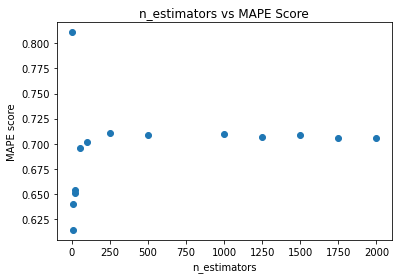

In [241]:
import matplotlib.pyplot as plt
plt.scatter(n_estimators, error_esti)
plt.xlabel('n_estimators')
plt.ylabel('MAPE score')
plt.title('n_estimators vs MAPE Score')
plt.show()

In [243]:
n_estimators= [1,5,10,19,20,50,100,250,500,1000,1250,1500,1750,2000]
randome_state= list(range(20, 1001,20))
error_esti=[]

for i in randome_state :

  regressor = RandomForestRegressor(n_estimators = 10, random_state = i)
 
 
  regressor.fit(X_train, y_train) 
  ypred = np.round(regressor.predict(X_val))
  error_esti.append(mean_absolute_percentage_error(y_val,ypred))
  print(mean_absolute_percentage_error(y_val,ypred))

0.7391654983689718
0.7290552447582195
0.7763703465598323
0.7180508417050422
0.7137846079149938
0.7117225431176146
0.7107232735092184
0.7197780470639246
0.7343287082739249
0.7594369292285461
0.6973558009883017
0.7154208884442391
0.7157987045666293
0.7567947869965216
0.7605689509944513
0.7194270744479293
0.6978821047167283
0.6988802718944838
0.7358210202662981
0.716506576698807
0.732817062721694
0.7215718788059564
0.7118997629725085
0.6954418774282538
0.7329588611925674
0.6852516896831643
0.6914359637568388
0.7516754449362923
0.7044665658386253
0.7197769339305848
0.7025688561834386
0.718880102272811
0.7452123368519937
0.7383266909475866
0.6866433673705886
0.7304385979018344
0.6876816944204908
0.73122539371672
0.6141817606915886
0.7481143945235038
0.6951683152261023
0.7567591612991954
0.707738615328059
0.778404448005554
0.7044192935848976
0.7032753493877761
0.7417668821128561
0.673257401460881
0.710769398630979
0.7021317414160457


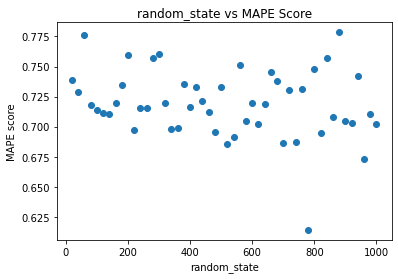

In [245]:
import matplotlib.pyplot as plt
plt.scatter(randome_state, error_esti)
plt.xlabel('random_state')
plt.ylabel('MAPE score')
plt.title('random_state vs MAPE Score')
plt.show()

In [246]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 780)
 
 
regressor.fit(X_train, y_train) 
ypred = np.round(regressor.predict(X_val))
error_esti.append(mean_absolute_percentage_error(y_val,ypred))
print(mean_absolute_percentage_error(y_val,ypred))

0.6141817606915886


In [247]:
(abs(ypred-y_val).sum())/(y_val.sum())

0.3797909407665505

In [266]:
d2 = pd.Series(ypred,name='PredictedSales')
df2=pd.concat([validation,y_val, d2], axis=1)
df2

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales,WeeklySales,PredictedSales
0,2,1006090,21,2,0,0.0,9,9,18.0
1,2,1105009,21,2,0,0.0,15,15,9.0
2,2,1098502,23,3,0,0.0,7,7,6.0
3,1,1081321,23,3,0,0.0,25,25,20.0
4,4,1074823,21,2,0,0.0,24,24,14.0
...,...,...,...,...,...,...,...,...,...
368,2,40759,21,2,0,0.0,52,52,43.0
369,2,1006090,22,2,0,0.0,20,20,18.0
370,1,1090303,21,2,0,0.0,12,12,12.0
371,2,1090276,23,3,0,0.0,8,8,7.0


No handles with labels found to put in legend.


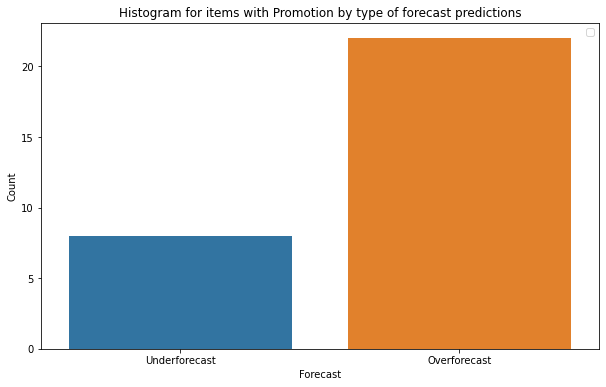

In [273]:
plt.figure(figsize=(10, 6))

sns.barplot(x=['Underforecast','Overforecast'],y=[8,22])

plt.title("Histogram for items with Promotion by type of forecast predictions")
plt.xlabel('Forecast')
plt.ylabel('Count')
plt.legend()


In [270]:
df2['OnPromo'].value_counts()

0    351
1     22
Name: OnPromo, dtype: int64

In [249]:
(abs(df1['PredictedSales']-df1['WeeklySales']).sum())/(y_val.sum())

0.25680914756833684

In [265]:
df3=df.loc[df['PredictedSales']>df['WeeklySales']]
df3

,WeeklySales,PredictedSales
0,9,18.0
8,19,21.0
14,8,9.0
17,84,94.0
20,20,23.0
...,...,...
354,13,19.0
359,72,180.0
365,5,7.0
366,8,12.0


In [251]:
(abs(df3['PredictedSales']-df3['WeeklySales']).sum())/(y_val.sum())

0.26451391274476127

In [254]:
tra_result

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
0,2,1071115,12,12,0,0.0,2
1,4,210652,20,2,0,0.0,8
2,2,877624,12,12,0,0.0,32
3,1,371104,12,12,0,0.0,11
4,1,1090294,12,12,0,0.0,14
...,...,...,...,...,...,...,...
4530,2,210868,4,10,0,0.0,4
4531,2,213802,5,11,0,0.0,8
4532,2,1090258,4,10,0,0.0,3
4533,1,48940,2,10,0,0.0,12


In [263]:
tra_result.loc[tra_result['OnPromo']==1]

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales,WeekPromo
13,2,130993,20,2,1,7.0,66,23873
21,1,379249,12,12,1,7.0,108,23873
22,2,124954,20,2,1,21.0,34,23873
25,2,1101571,20,2,1,14.0,29,23873
34,1,1085749,12,12,1,7.0,17,23873
...,...,...,...,...,...,...,...,...
4480,2,23569,5,10,1,7.5,13,23873
4501,1,1085749,5,10,1,7.0,5,23873
4522,4,1074823,5,11,1,42.0,91,23873
4524,2,23569,5,11,1,7.5,13,23873


In [264]:
tra_result.sort_values(
     by="WeeklySales",
     ascending=False)


,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales,WeekPromo
1650,1,17296,16,1,0,0.0,908,157594
3536,3,169504,1,10,0,0.0,824,157594
3318,3,169504,5,11,0,0.0,727,157594
4325,3,169504,5,10,0,0.0,727,157594
2668,3,169504,11,12,0,0.0,718,157594
...,...,...,...,...,...,...,...,...
3359,2,687616,6,11,0,0.0,1,157594
3293,2,267496,5,11,0,0.0,1,157594
3232,1,1015621,5,11,0,0.0,1,157594
2998,1,1090105,17,1,0,0.0,1,157594


In [261]:
tra_result['WeekPromo'] = tra_result.groupby(['OnPromo'])['WeeklySales'].transform(sum)


Text(0, 0.5, 'WeeklySales')

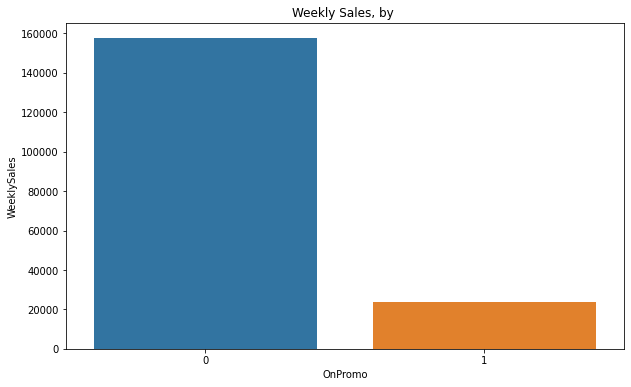

In [262]:
import seaborn as sns
plt.figure(figsize=(10,6))

# Add title
plt.title("Weekly Sales, by ")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=tra_result['OnPromo'], y=tra_result['WeekPromo'])

# Add label for vertical axis
plt.ylabel("WeeklySales")